In [1]:
                                                                    # K-NEAREST NEIGHBOURS

In [5]:
import pandas as pd
df = pd.read_csv("zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
df['animal_name'] = le.fit_transform(df['animal name'])

In [12]:
df.to_csv("zoo.csv", index=False)

In [16]:
df1 = df.head().drop("animal name", axis='columns')
df1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,animal_name
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,2
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,3
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,4


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   hair         5 non-null      int64
 1   feathers     5 non-null      int64
 2   eggs         5 non-null      int64
 3   milk         5 non-null      int64
 4   airborne     5 non-null      int64
 5   aquatic      5 non-null      int64
 6   predator     5 non-null      int64
 7   toothed      5 non-null      int64
 8   backbone     5 non-null      int64
 9   breathes     5 non-null      int64
 10  venomous     5 non-null      int64
 11  fins         5 non-null      int64
 12  legs         5 non-null      int64
 13  tail         5 non-null      int64
 14  domestic     5 non-null      int64
 15  catsize      5 non-null      int64
 16  type         5 non-null      int64
 17  animal_name  5 non-null      int32
dtypes: int32(1), int64(17)
memory usage: 832.0 bytes


In [18]:
df1.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,animal_name
count,5.000000,5.0,5.000000,5.000000,5.0,5.000000,5.000000,5.0,5.0,5.000000,5.0,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000
mean,0.800000,0.0,0.200000,0.800000,0.0,0.200000,0.800000,1.0,1.0,0.800000,0.0,0.200000,3.200000,0.600000,0.0,0.800000,1.600000,2.000000
std,0.447214,0.0,0.447214,0.447214,0.0,0.447214,0.447214,0.0,0.0,0.447214,0.0,0.447214,1.788854,0.547723,0.0,0.447214,1.341641,1.581139
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
25%,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1.000000,1.0,1.0,1.000000,0.0,0.000000,4.000000,0.000000,0.0,1.000000,1.000000,1.000000
50%,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1.000000,1.0,1.0,1.000000,0.0,0.000000,4.000000,1.000000,0.0,1.000000,1.000000,2.000000
75%,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1.000000,1.0,1.0,1.000000,0.0,0.000000,4.000000,1.000000,0.0,1.000000,1.000000,3.000000
max,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.0,1.0,1.000000,0.0,1.000000,4.000000,1.000000,0.0,1.000000,4.000000,4.000000


In [33]:
z = df1.corr(numeric_only=True)
z

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,animal_name
hair,1.000000e+00,NaN,-1.000000,1.000000e+00,NaN,-1.000000,-0.250000,NaN,NaN,1.000000e+00,NaN,-1.000000,1.000000e+00,-0.408248,NaN,1.000000e+00,-1.000000,-3.925231e-17
feathers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eggs,-1.000000e+00,NaN,1.000000,-1.000000e+00,NaN,1.000000,0.250000,NaN,NaN,-1.000000e+00,NaN,1.000000,-1.000000e+00,0.408248,NaN,-1.000000e+00,1.000000,0.000000e+00
milk,1.000000e+00,NaN,-1.000000,1.000000e+00,NaN,-1.000000,-0.250000,NaN,NaN,1.000000e+00,NaN,-1.000000,1.000000e+00,-0.408248,NaN,1.000000e+00,-1.000000,-3.925231e-17
airborne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aquatic,-1.000000e+00,NaN,1.000000,-1.000000e+00,NaN,1.000000,0.250000,NaN,NaN,-1.000000e+00,NaN,1.000000,-1.000000e+00,0.408248,NaN,-1.000000e+00,1.000000,0.000000e+00
predator,-2.500000e-01,NaN,0.250000,-2.500000e-01,NaN,0.250000,1.000000,NaN,NaN,-2.500000e-01,NaN,0.250000,-2.500000e-01,-0.408248,NaN,-2.500000e-01,0.250000,3.535534e-01
toothed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
backbone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breathes,1.000000e+00,NaN,-1.000000,1.000000e+00,NaN,-1.000000,-0.250000,NaN,NaN,1.000000e+00,NaN,-1.000000,1.000000e+00,-0.408248,NaN,1.000000e+00,-1.000000,-3.925231e-17


In [2]:
# Tasks:

In [3]:
# 1. Analyse the data using the visualizations

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Kishan Senjaliya\AppData\Local\Temp\ipykernel_15156\3181621905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


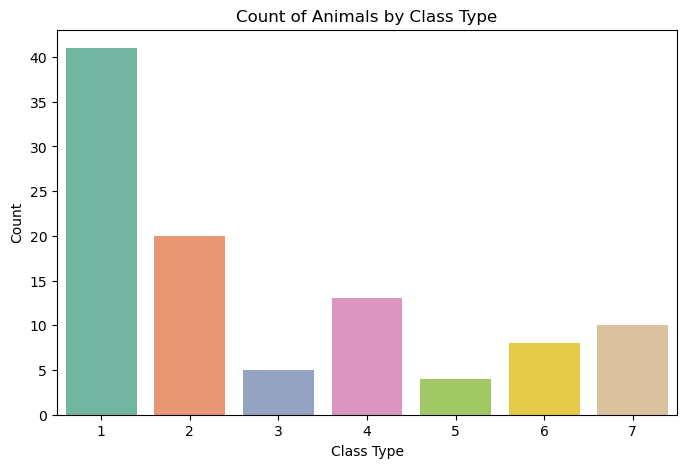

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Count of Animals by Class Type')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

C:\Users\Kishan Senjaliya\AppData\Local\Temp\ipykernel_15156\1847959125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1', legend=False)
C:\Users\Kishan Senjaliya\AppData\Local\Temp\ipykernel_15156\1847959125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1', legend=False)
C:\Users\Kishan Senjaliya\AppData\Local\Temp\ipykernel_15156\1847959125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1', legend=False)
C:\Users\Kishan Senjaliya\AppDa

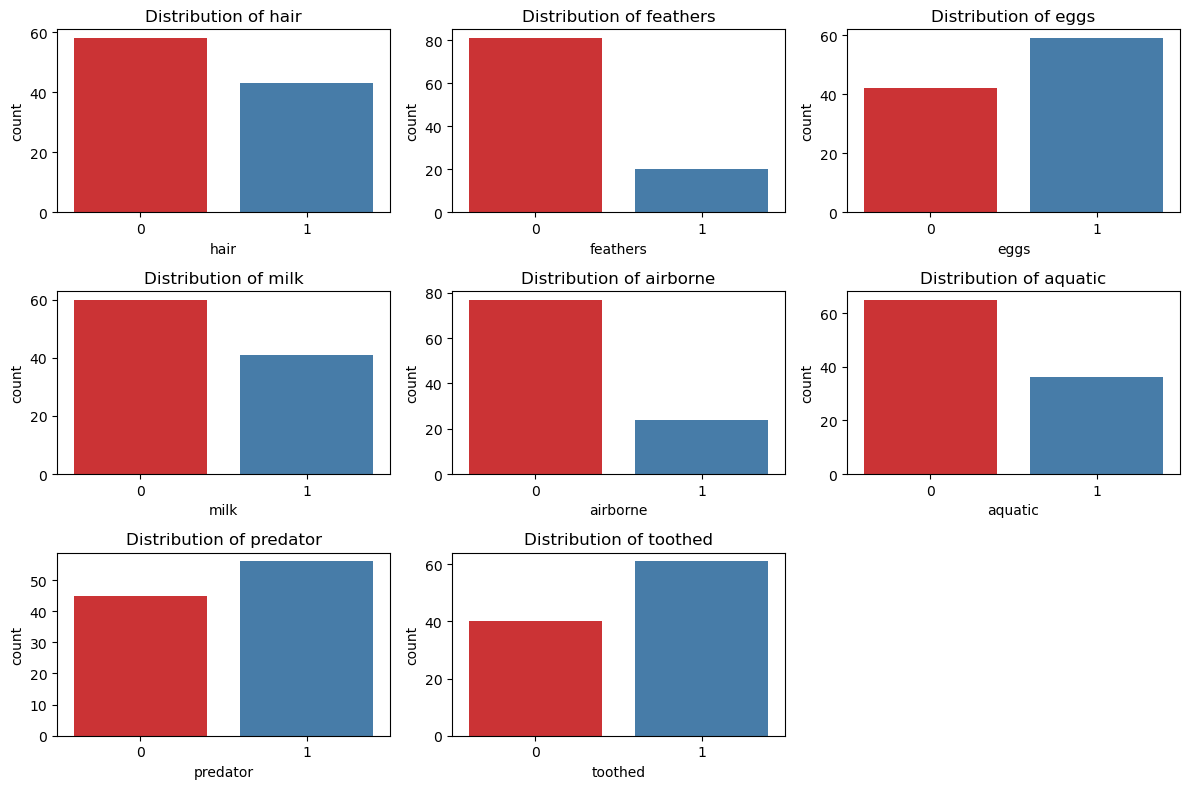

In [31]:
binary_cols = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed']

plt.figure(figsize=(12,8))
for i, col in enumerate(binary_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=df, palette='Set1', legend=False)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

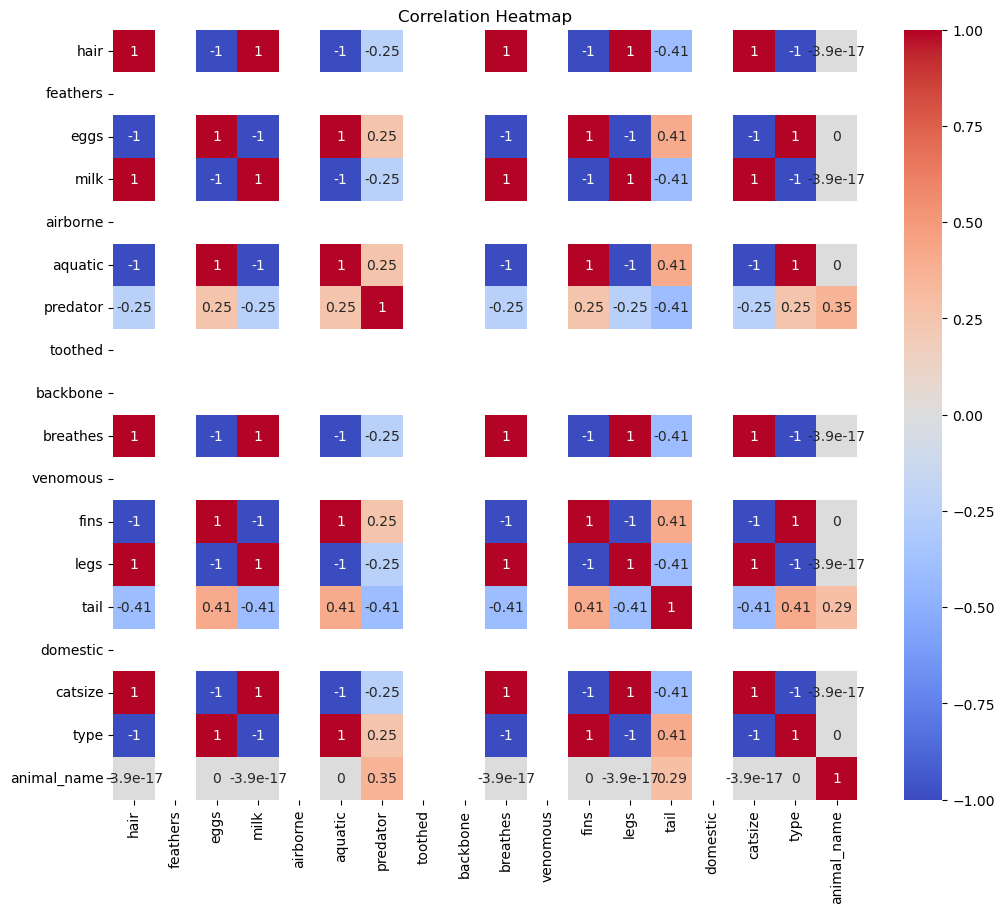

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(z, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

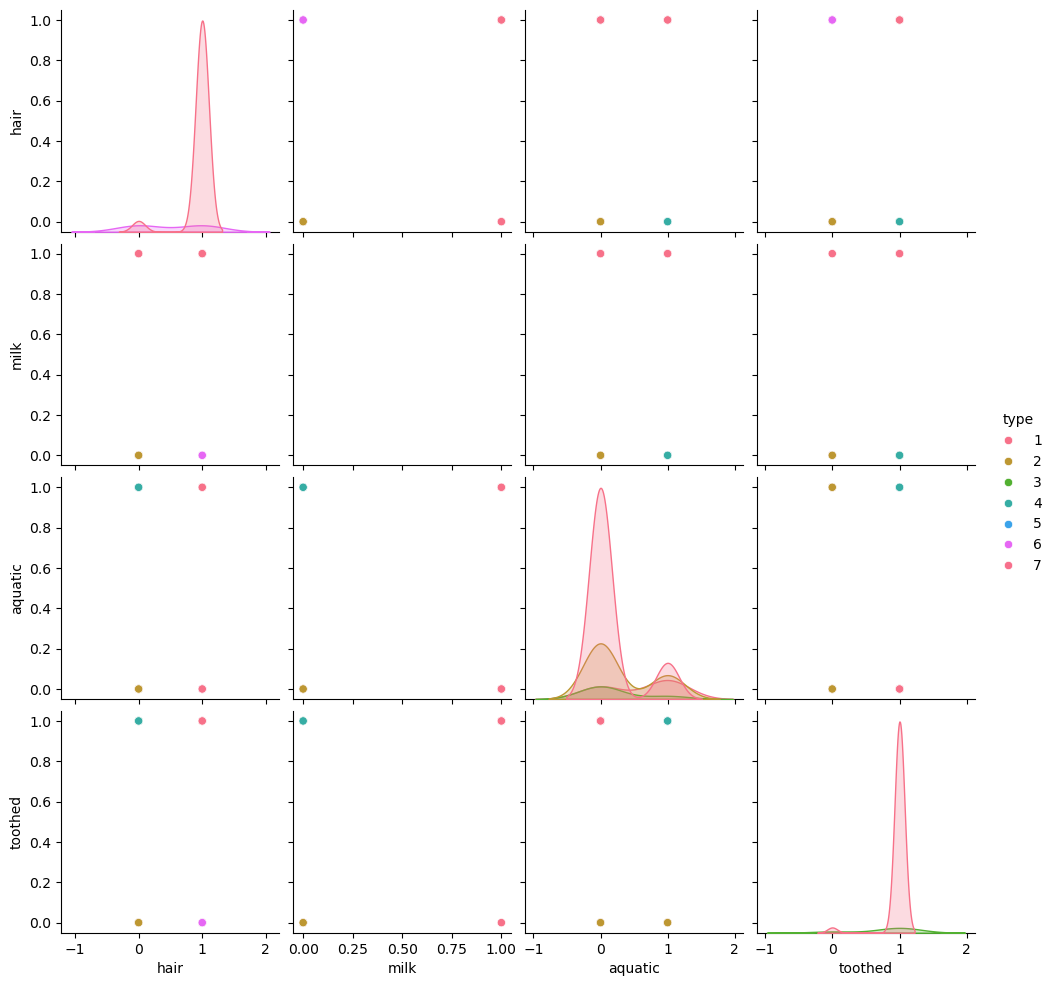

In [37]:
selected_cols = ['hair', 'milk', 'aquatic', 'toothed', 'type']
sns.pairplot(df[selected_cols], hue='type', palette='husl')
plt.show()

In [38]:
# 2. Preprocess the data by handling missing values & Outliers, if any.

In [39]:
df1.isnull().sum()

hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
animal_name    0
dtype: int64

In [57]:
import numpy as np

def remove_outliers_iqr(df1, columns):
    for col in columns:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df1 = df1[(df1[col] >= lower) & (df1[col] <= upper)]
    return df

numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
df_cleaned = remove_outliers_iqr(df1, numeric_cols)

In [58]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [72]:
df_cleaned.to_csv('zoo.csv', index=False)
df2 = df_cleaned.drop('animal name', axis='columns')

In [73]:
# 3. Split the dataset into training and testing sets (80% training, 20% testing).

In [76]:
x = df2.drop("type", axis="columns")
y = df2['type']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [80]:
# 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [86]:
y_pred = knn.predict(x_test)
y_pred

array([2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 2, 1],
      dtype=int64)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least pop

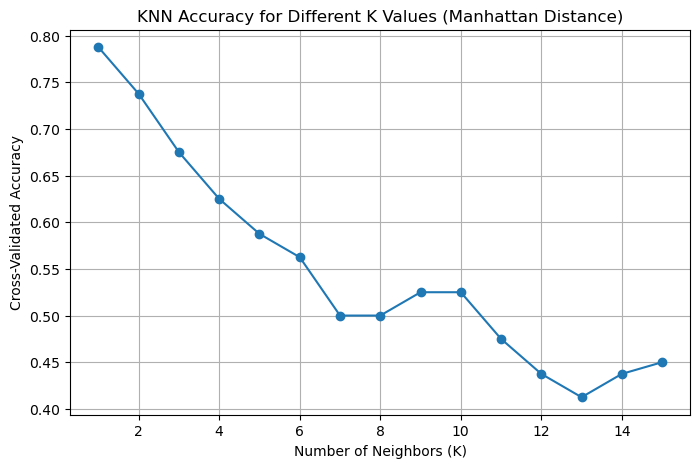

Best K: 1 with Accuracy: 0.7875


In [89]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

k_values = list(range(1, 16))
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    cv_scores = cross_val_score(knn, x_train, y_train, cv=5)
    scores.append(cv_scores.mean())


plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Accuracy for Different K Values (Manhattan Distance)')
plt.grid(True)
plt.show()


best_k = k_values[scores.index(max(scores))]
print(f"Best K: {best_k} with Accuracy: {max(scores):.4f}")


In [93]:
final_knn = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
final_knn.fit(x_train, y_train)

y_pred = final_knn.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         8
           2       1.00      0.40      0.57         5
           3       0.00      0.00      0.00         0
           4       1.00      0.67      0.80         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.50      0.50      0.50         4

    accuracy                           0.67        21
   macro avg       0.47      0.37      0.39        21
weighted avg       0.78      0.67      0.68        21



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.6667
Precision: 0.7810
Recall   : 0.6667
F1 Score : 0.6842


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [96]:
y_pred = final_knn.predict(x_test)

In [97]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           1       0.80      1.00      0.89         8
           2       1.00      0.40      0.57         5
           3       0.00      0.00      0.00         0
           4       1.00      0.67      0.80         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.50      0.50      0.50         4

    accuracy                           0.67        21
   macro avg       0.47      0.37      0.39        21
weighted avg       0.78      0.67      0.68        21



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [98]:
# 7. Visualize the decision boundaries of the classifier.

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [101]:
pca = PCA(n_components=2)
x_train_2D = pca.fit_transform(x_train)
x_test_2D = pca.transform(x_test)

In [102]:
knn_2D = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn_2D.fit(x_train_2D, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

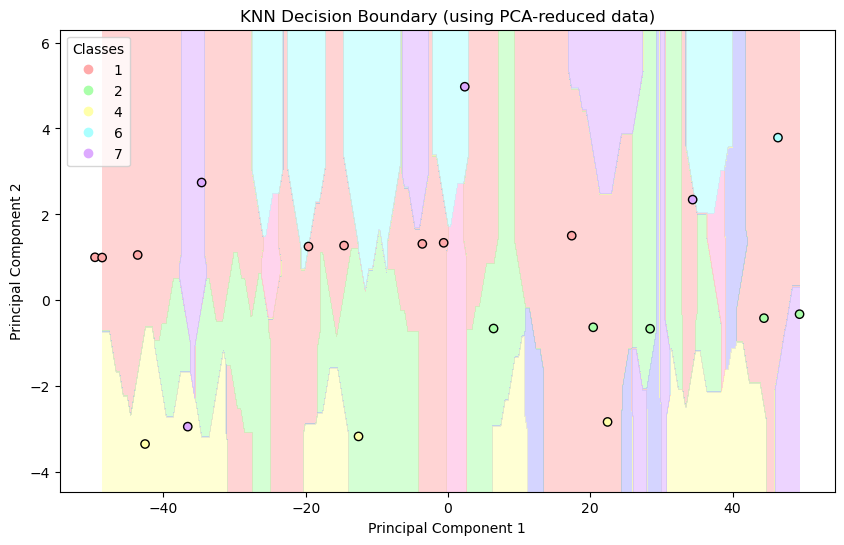

In [103]:
x_min, x_max = x_train_2D[:, 0].min() - 1, x_train_2D[:, 0].max() + 1
y_min, y_max = x_train_2D[:, 1].min() - 1, x_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAADD', '#AAFFFF', '#DDAAFF'])

plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
scatter = plt.scatter(x_test_2D[:, 0], x_test_2D[:, 1], c=y_test, cmap=cmap, edgecolor='k')
plt.title("KNN Decision Boundary (using PCA-reduced data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

In [1]:
# Interview Questions:

In [2]:
# 1. What are the key hyperparameters in KNN?

In [3]:
# 1. n_neighbors (or k)
# Meaning: Number of neighbors to consider for making predictions.

# Impact:
# Small k (e.g., 1) → model is sensitive to noise (high variance).
# Large k → smoother boundaries but may ignore local patterns (high bias).
# Typical values: Odd numbers (e.g., 3, 5, 7) to avoid ties in classification.

In [4]:
# 2. weights
# Options:

# 'uniform': All neighbors are weighted equally.
# 'distance': Closer neighbors get more weight (better in many real-world cases).
# Impact: 'distance' can improve accuracy, especially if nearby points are more relevant.

In [5]:
# 3. metric (distance function)
# Common choices:

# 'minkowski' (default, allows switching between Euclidean and Manhattan)
# 'euclidean': straight-line distance
# 'manhattan': sum of absolute differences
# Custom metrics can also be used.
# Use with p (see next point).

In [6]:
# 4. p (used with metric='minkowski')
# Meaning: Power parameter for the Minkowski metric:

# p = 1 → Manhattan distance
# p = 2 → Euclidean distance
# Impact: Controls how distance is calculated.

In [7]:
# algorithm
# Options:

# 'auto': Let sklearn choose the best algorithm.
# 'ball_tree', 'kd_tree', 'brute'
# Impact: Affects computation speed, not model accuracy.

In [8]:
# 2. What distance metrics can be used in KNN?

In [ ]:
# | Metric      | Type of Data        | Scikit-learn Setting      |
# | ----------- | ------------------- | ------------------------- |
# | Euclidean   | Continuous, numeric | `metric='euclidean'`      |
# | Manhattan   | Grid, numeric       | `metric='manhattan'`      |
# | Minkowski   | Flexible (`p`)      | `metric='minkowski', p=x` |
# | Chebyshev   | Max diff only       | `metric='chebyshev'`      |
# | Cosine      | Text/sparse vectors | `metric='cosine'`         |
# | Hamming     | Binary/categorical  | `metric='hamming'`        |
# | Mahalanobis | Correlated features | `metric='mahalanobis'`    |